In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
df = pd.read_csv('combined_bus_status_unix.csv')
# List of columns to remove
columns_to_remove = ['bus_id', 'trip_id', 'route_id', 'next_stop_name', 'stop_sequence', 'wheelchair_boarding']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)
print(df)
X_train, X_test, y_train, y_test = train_test_split(df.drop('status', axis=1), df['status'], test_size=0.2, random_state=42)

     current_lat  current_lon  next_stop_id  next_stop_lat  next_stop_lon  \
0      43.854668   -79.055603          1601      43.853329     -79.060678   
1      43.884548   -78.921936           393      43.882884     -78.929034   
2      43.946533   -78.893951          2712      43.947746     -78.895601   
3      43.820915   -79.054550          1712      43.824595     -79.053029   
4      43.857716   -79.040764          2238      43.858841     -79.035728   
..           ...          ...           ...            ...            ...   
158    43.809349   -79.129768          1616      43.813320     -79.123324   
159    43.904865   -78.832016          1135      43.905816     -78.821771   
160    43.948200   -78.896347          3556      43.955642     -78.899754   
161    43.862099   -79.022552          1591      43.863408     -79.016841   
162    43.843182   -79.021835          2301      43.841093     -79.030872   

     current_time  position_timestamp  expected_arrival_time  \
0      1742

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
# test the model on the test data
y_pred = model.predict(X_test)
# Calculate basic classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print individual metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report (includes per-class metrics)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Optional: Pretty print confusion matrix with labels (assuming binary or multiclass)
unique_labels = np.unique(y_test)
print("\nConfusion Matrix (with labels):")
print(f"{'':>15}", end="")
for label in unique_labels:
    print(f"{label:>10}", end="")
print()
for i, row in enumerate(conf_matrix):
    print(f"{unique_labels[i]:>15}", end="")
    for val in row:
        print(f"{val:>10}", end="")
    print()

# Optional: If you want percentages in the confusion matrix
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print("\nConfusion Matrix (percentages):")
print(f"{'':>15}", end="")
for label in unique_labels:
    print(f"{label:>10}", end="")
print()
for i, row in enumerate(conf_matrix_percent):
    print(f"{unique_labels[i]:>15}", end="")
    for val in row:
        print(f"{val:>9.1f}%", end="")
    print()

Classification Metrics:
Accuracy: 0.7576
Precision: 0.8251
Recall: 0.7576
F1-Score: 0.6966

Detailed Classification Report:
              precision    recall  f1-score   support

       early       0.67      1.00      0.80        10
        late       0.81      1.00      0.90        13
     on-time       1.00      0.20      0.33        10

    accuracy                           0.76        33
   macro avg       0.83      0.73      0.68        33
weighted avg       0.83      0.76      0.70        33


Confusion Matrix:
[[10  0  0]
 [ 0 13  0]
 [ 5  3  2]]

Confusion Matrix (with labels):
                    early      late   on-time
          early        10         0         0
           late         0        13         0
        on-time         5         3         2

Confusion Matrix (percentages):
                    early      late   on-time
          early    100.0%      0.0%      0.0%
           late      0.0%    100.0%      0.0%
        on-time     50.0%     30.0%     20.0%


Decision Tree Accuracy: 96.97%
Confusion Matrix:
[[ 9  0  1]
 [ 0 13  0]
 [ 0  0 10]]


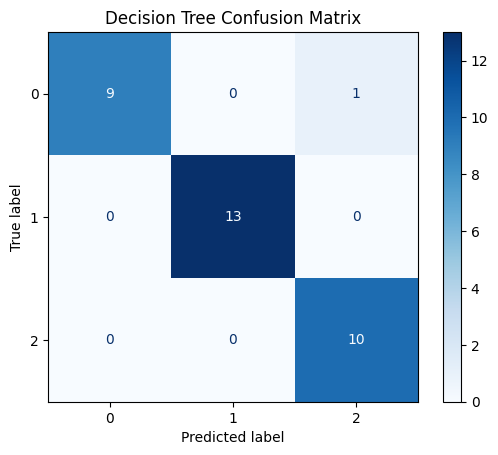

In [22]:
import pickle
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Save the model
with open("decision_tree_model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Decision Tree Accuracy: {acc * 100:.2f}%")
print("Confusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Save the scaler to use during inference
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

MLP Classifier Accuracy: 81.82%
Confusion Matrix:
[[10  0  0]
 [ 0 12  1]
 [ 4  1  5]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


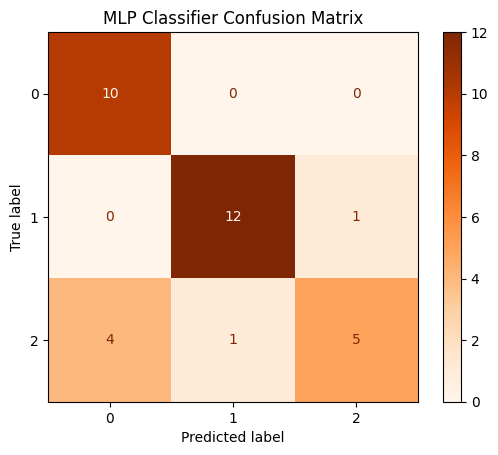

In [21]:
from sklearn.neural_network import MLPClassifier
# Train MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"MLP Classifier Accuracy: {acc * 100:.2f}%")
print("Confusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges)
plt.title("MLP Classifier Confusion Matrix")
plt.show()